<a href="https://colab.research.google.com/github/truongthuanr/transfer/blob/main/CommonLit_Idea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some idea for "Readable CommonLit"

https://www.kaggle.com/c/commonlitreadabilityprize/overview

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Line wrap setting for notebook

In [2]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

### Get helper function

In [3]:
# Get the heper function 
!wget https://raw.githubusercontent.com/truongthuanr/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper function for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2021-07-26 17:46:02--  https://raw.githubusercontent.com/truongthuanr/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10306 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.06K  --.-KB/s    in 0s      

2021-07-26 17:46:02 (77.6 MB/s) - ‘helper_functions.py’ saved [10306/10306]



## Get text data set
The data set we going to using is from Kagle "CommonLit Readability Prize" Competetion
https://www.kaggle.com/c/commonlitreadabilityprize/data


## Visualizing dataset

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

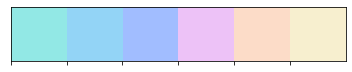

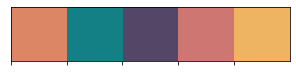

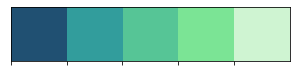

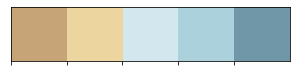

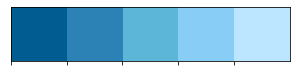

In [5]:
colorset1 = ["#92E8E5", "#93D4F6", "#A1BDFF", "#EDC2F7", "#FCDCC8", "#F7EFCF",]
colorset2 = ["#DC8665", "#138086", "#534666", "#CD7672", "#EEB462"]
colorset3 = ["#205072", "#329D9C", "#56C596", "#7BE495", "#CFF4D2"]
colorset4 = ["#C6A477", "#ECD59F", "#D3E7EE", "#ABD1DC", "#7097A8"]
colorset5 = ["#015C92", "#2D82B5", "#5BB6D8", "#88CDF6", "#BCE6FF"]
sns.palplot(sns.color_palette(colorset1),size=1)
sns.palplot(sns.color_palette(colorset2),size=1)
sns.palplot(sns.color_palette(colorset3),size=1)
sns.palplot(sns.color_palette(colorset4),size=1)
sns.palplot(sns.color_palette(colorset5),size=1)

In [8]:
import pandas as pd
train_df = pd.read_csv("/content/drive/MyDrive/01_Personal/01_Study/01_ML/02_CommonLit_Readability/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/01_Personal/01_Study/01_ML/02_CommonLit_Readability/test.csv")

In [9]:
train_df.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

In [10]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)

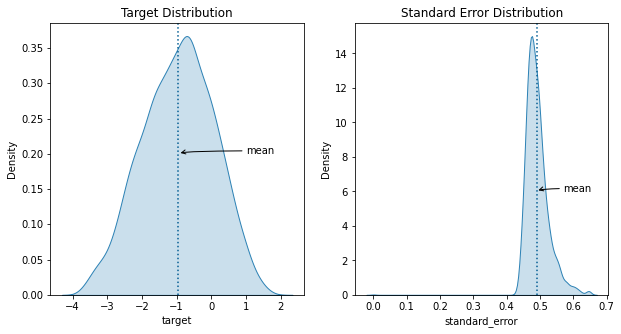

In [11]:
# How the target look like
fig, axes = plt.subplots(1,2,figsize=(10, 5))
sns.kdeplot(train_df.target,color=colorset5[1],shade=True, ax=axes[0]) # Plot the target
sns.kdeplot(train_df.standard_error,color=colorset5[1],shade=True, ax=axes[1]) # Plot the sandard_error

# Set the title
axes[0].set_title('Target Distribution')
axes[1].set_title('Standard Error Distribution')

axes[0].axvline(train_df.target.mean(),color=colorset5[0],linestyle=':')
axes[1].axvline(train_df.standard_error.mean(),color=colorset5[0],linestyle=':')

axes[0].annotate('mean', xy=(-0.3* np.pi, 0.2), xytext=(1, 0.2),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
axes[1].annotate('mean', xy=(0.49, 6), xytext=(0.57, 6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

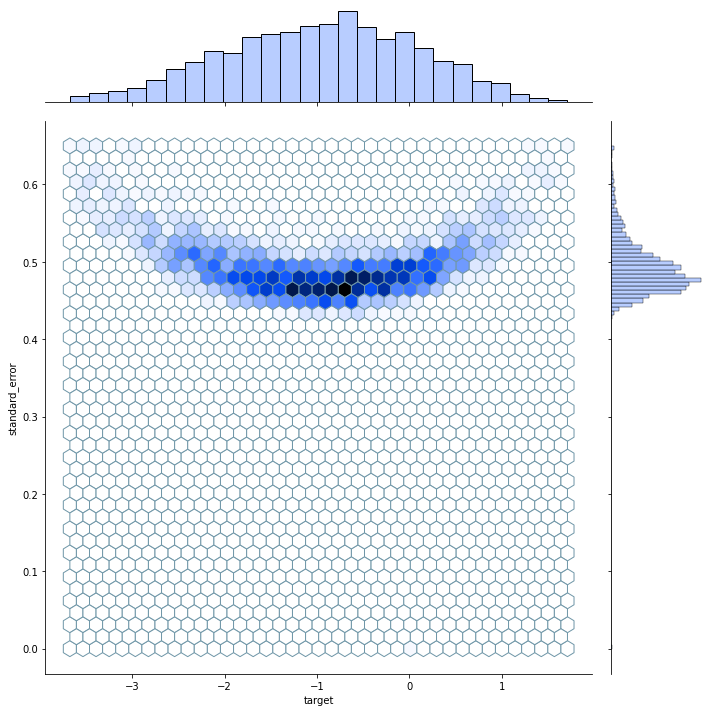

In [12]:
sns.jointplot(x=train_df.target, 
              y=train_df.standard_error,
              kind='hex',
              height=10,
              edgecolor=colorset4[4],
              color=colorset1[2])

In [13]:
# How many total sample?
len(train_df), len(test_df)

(2834, 7)

In [14]:
# visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-2)
for row in train_df_shuffled[["excerpt","target"]][random_index:random_index+2].itertuples():
  _, text, target = row
  print(f"Target: {target}")
  print(f"{text}\n")
  print("---")

Target: 0.568791653
A woman with her baby went into the forest. She went to pick fruit. In the forest she found a tree with ripe fruit. She put down her sleeping baby and climbed the tree. An erotot from another community came by. He saw the baby. He was surprised. He asked himself, "Where is the mother?" He bent down. The sound of the chains on his neck woke the baby. He let the baby play with his chains. The baby laughed as he played. The woman looked down to see why the baby was laughing. She saw the stranger. She was so afraid that she dropped her bag of fruit. The erotot looked up. He said, "Don't be afraid. I'm only playing with your beautiful baby." So, the woman came down from the tree. The erotot took off one of his chains. He gave it to the baby. "Here is a gift for you," he said. "Go home with your baby. Tell your husband to move to a more peaceful village. Your baby has given me peace," said the erotot.

---
Target: -1.2931679
Martha knew well enough that she had to remind 

Text(0.5, 1.0, 'License Distribution')

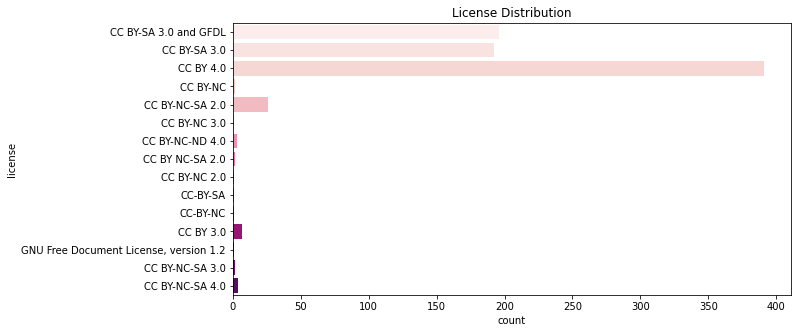

In [15]:
# Take a look on other column
plt.figure(figsize=(10,5))
# Use the count plot with horizontal bar due to long label of license
sns.countplot(data=train_df,y='license',palette="RdPu")

plt.title('License Distribution')

## Split data into training and validation sets

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Use train_test_split to split trainind data into training and validation sets
train_excerpt, val_excerpt, train_target, val_target = train_test_split(train_df_shuffled["excerpt"].to_numpy(),
                                                                       train_df_shuffled["target"].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=41)

In [18]:
len(train_excerpt), len(train_target), len(val_excerpt), len(val_target)

(2550, 2550, 284, 284)

## BERT Model

In [19]:
!pip install tensorflow_text

     |████████████████████████████████| 4.3 MB 31.6 MB/s 


In [20]:
# Install tensorflow text
import tensorflow as tf

import tensorflow_text as text  # Registers the ops.
import tensorflow_hub as hub
from tensorflow.keras import layers

In [21]:
# Create a tensorboard callback (need to craete a new one for each model)

from helper_functions import create_tensorboard_callback

# Create a directory to save the Tensorboard Logs

SAVE_DIR = 'model_logs'

In [22]:

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
    trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

In [ ]:
embedding_model = tf.keras.Model(text_input, pooled_output)

sentences = tf.constant(["(your text here)"])
print(embedding_model(sentences))

In [24]:
model_outputs = layers.Dense(1,activation=None)(pooled_output)
model = tf.keras.Model(text_input, model_outputs, name='demo_bert')

In [25]:
model.summary()

Model: "demo_bert"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_mask': (None 0           input_1[0][0]                    
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'encoder_outputs':  109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
__________________________________________________________________________________________

In [28]:
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mse"])

In [26]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ccfc4ccc-aca7-1454-76cc-e071dc70cebe)


In [29]:
# Fit model
model_history = model.fit(train_excerpt, train_target,
                          epochs=5,
                          validation_data=(val_excerpt,val_target),
                          callbacks=[create_tensorboard_callback(SAVE_DIR,'bertdemo')])

Saving TensorBoard log files to: model_logs/bertdemo/20210727-004812
Epoch 1/5
80/80 [==============================] - 94s 988ms/step - loss: 1.6711 - mse: 1.6711 - val_loss: 0.9517 - val_mse: 0.9517
Epoch 2/5
80/80 [==============================] - 76s 952ms/step - loss: 1.1175 - mse: 1.1175 - val_loss: 0.9510 - val_mse: 0.9510
Epoch 3/5
80/80 [==============================] - 76s 955ms/step - loss: 1.1095 - mse: 1.1095 - val_loss: 0.9681 - val_mse: 0.9681
Epoch 4/5
80/80 [==============================] - 74s 926ms/step - loss: 1.1252 - mse: 1.1252 - val_loss: 0.9576 - val_mse: 0.9576
Epoch 5/5
80/80 [==============================] - 76s 953ms/step - loss: 1.1104 - mse: 1.1104 - val_loss: 0.9552 - val_mse: 0.9552
